## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from prophet import Prophet
from sklearn.metrics import mean_squared_error,mean_absolute_error

C:\Users\NURAFIQAHALIAHBINTIQ\anaconda3\envs\ForecastPython\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


## CSV DATA

In [2]:
data = pd.read_csv('malaysia_parcel_volumes_2.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

## Linear Regression

In [3]:
X_lr = data.index.to_series().apply(lambda x: x.toordinal()).values.reshape(-1,1)
y_lr = data['Parcel Volume'].values
regression_lr = LinearRegression()
regression_lr.fit(X_lr,y_lr)
y_lr_pred = regression_lr.predict(X_lr)

## ARIMA

In [4]:
model_arima = ARIMA(data['Parcel Volume'], order=(0,0,0))
model_fit = model_arima.fit()
predictions_arima = model_fit.predict(start='2023-12-01', end='2024-03-01')

C:\Users\NURAFIQAHALIAHBINTIQ\anaconda3\envs\ForecastPython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\NURAFIQAHALIAHBINTIQ\anaconda3\envs\ForecastPython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\NURAFIQAHALIAHBINTIQ\anaconda3\envs\ForecastPython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Random Forest

In [5]:
X_rf = data.index.astype('int64').values.reshape(-1,1)
y_rf = data['Parcel Volume'].values

rf_model = RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_rf, y_rf)

predictions_rf = rf_model.predict(X_rf)

## Prophet

In [6]:
data_prophet = data.reset_index().rename(columns={'Date': 'ds', 'Parcel Volume': 'y'})
model_prophet = Prophet()
model_prophet.fit(data_prophet)
future_dates = model_prophet.make_future_dataframe(periods=0, freq='M')
forecast = model_prophet.predict(future_dates)
predictions_prophet = forecast[['ds', 'yhat']].tail(12).round(0)

12:16:52 - cmdstanpy - INFO - Chain [1] start processing
12:16:53 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\NURAFIQAHALIAHBINTIQ\anaconda3\envs\ForecastPython\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


## Figure

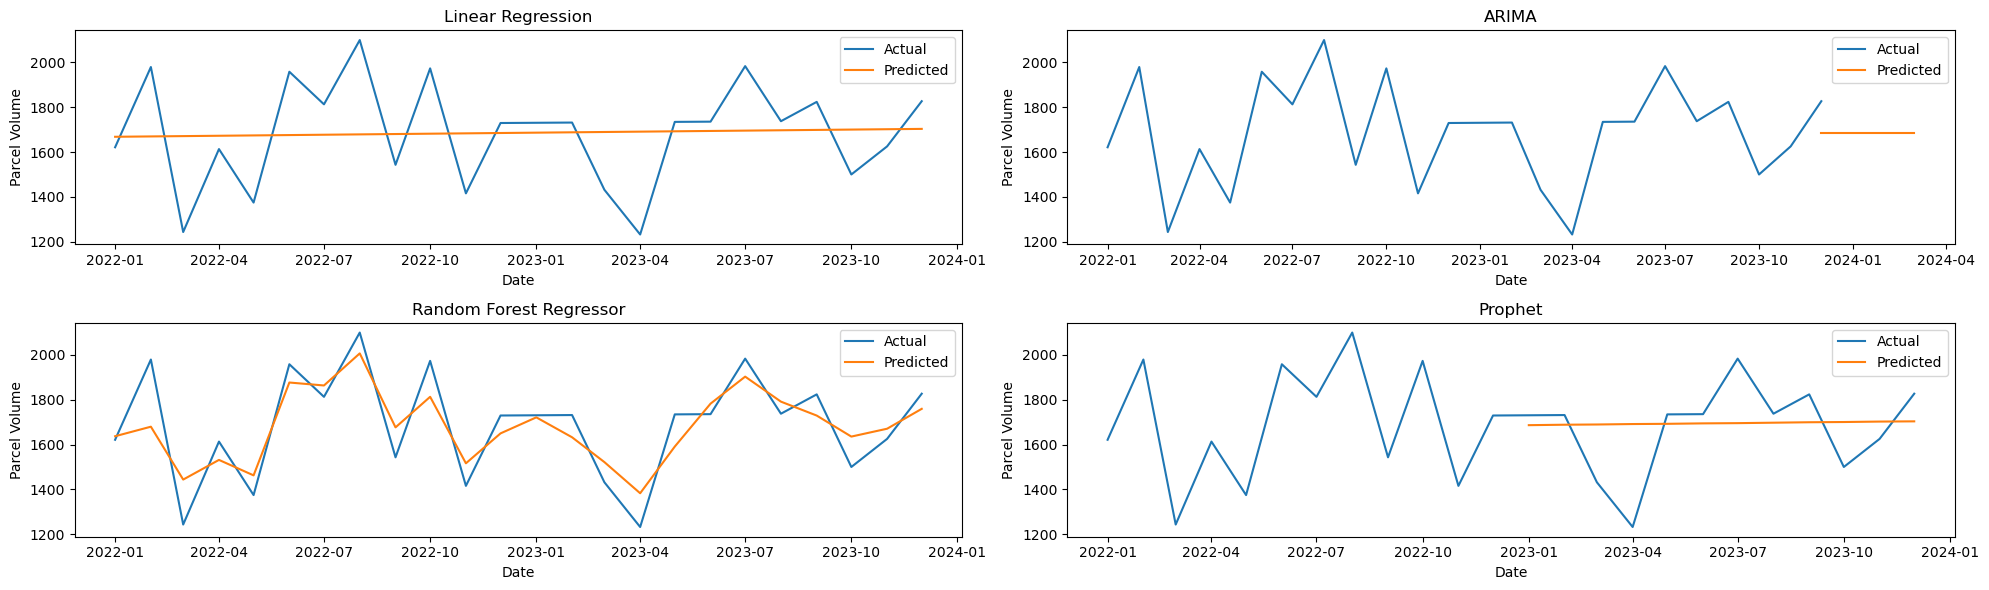

In [7]:
plt.figure(figsize=(20,6))

#Linear Regression
plt.subplot(221)
plt.plot(data.index,data['Parcel Volume'],label='Actual')
plt.plot(data.index,y_lr_pred,label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.legend()

plt.subplot(222)
plt.plot(data['Parcel Volume'], label='Actual')
plt.plot(predictions_arima,label='Predicted')
plt.title('ARIMA')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.legend()

plt.subplot(223)
plt.plot(data.index,data['Parcel Volume'],label='Actual')
plt.plot(data.index, predictions_rf,label='Predicted')
plt.title('Random Forest Regressor')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.legend()

plt.subplot(224)
plt.plot(data_prophet['ds'],data_prophet['y'],label='Actual')
plt.plot(predictions_prophet['ds'],predictions_prophet['yhat'],label='Predicted')
plt.title('Prophet')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# Calculate MSE and MAE for Linear Regression
mse_lr = mean_squared_error(data['Parcel Volume'], y_lr_pred)
mae_lr = mean_absolute_error(data['Parcel Volume'], y_lr_pred)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression MAE:", mae_lr)

# Check the lengths
print("Actual data length:", len(data['Parcel Volume'].loc['2023-01-01':'2023-12-01']))
print("Predictions length:", len(predictions_arima))

# Align lengths if necessary
actual_data = data['Parcel Volume'].loc['2023-01-01':'2023-12-01']
if len(actual_data) != len(predictions_arima):
    print("Aligning data and predictions...")
    actual_data = actual_data[:len(predictions_arima)]

# Calculate metrics
mse_arima = mean_squared_error(actual_data, predictions_arima)
mae_arima = mean_absolute_error(actual_data, predictions_arima)
print("ARIMA MSE:", mse_arima)
print("ARIMA MAE:", mae_arima)
# Calculate MSE and MAE for Random Forest Regressor
mse_rf = mean_squared_error(data['Parcel Volume'], predictions_rf)
mae_rf = mean_absolute_error(data['Parcel Volume'], predictions_rf)
print("Random Forest Regressor MSE:", mse_rf)
print("Random Forest Regressor MAE:", mae_rf)

# Calculate MSE and MAE for Prophet
mse_prophet = mean_squared_error(data_prophet['y'].tail(9), predictions_prophet['yhat'].tail(9))
mae_prophet = mean_absolute_error(data_prophet['y'].tail(9), predictions_prophet['yhat'].tail(9))
print("Prophet MSE:", mse_prophet)
print("Prophet MAE:", mae_prophet)

Linear Regression MSE: 52731.59131244922
Linear Regression MAE: 185.50059758097996
Actual data length: 12
Predictions length: 4
Aligning data and predictions...
ARIMA MSE: 68190.31250000015
ARIMA MAE: 199.0
Random Forest Regressor MSE: 13646.180295833334
Random Forest Regressor MAE: 99.79375
Prophet MSE: 41512.444444444445
Prophet MAE: 154.66666666666666
